##**Examen de Cinturón**
###**Datos Personales**

- Nombre Completo: Felipe Gonzalez Garrido
- ID Coding Dojo: 80479
- Track: MACHINE LEARNING V22.1 
- Nombre del examen: Diabetes
- Intento: 2


#Descripcion del problema

Este consiste en predecir de forma diagnostica si un paciente tiene diabetes o no, basandose en determinadas medida de diagnosticos incluidas en el conjunto de datos.

Se realizara:
- Limpieza de datos.
- Exploracion visual de datos.
- Creacion de un modelo optimo para predecir si paciente tiene diabetes.

# Solucion

# I. Análisis Exploratorio


**Manipulación de datos**


In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


**Librerias a utilizar**

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [225]:
filename = "/content/drive/MyDrive/Data CodingDojo/diabetes.csv"
df = pd.read_csv(filename)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Para evitar sesgo en el analisis, se excluiran todos los registros que cuenten con valores 0, con esto se tiene un universo mas acotado de examinados, pero con datos solidos para su analisis**

In [235]:
glucose = df["Glucose"] != 0
BP = df["BloodPressure"] != 0
thickness = df["SkinThickness"] != 0
insulin = df["Insulin"] != 0
bmi = df["BMI"] != 0
df = df[glucose & BP & thickness & insulin & bmi]

In [236]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Se puede afirmar que el conjunto de datos:**

- Su dimension por defecto es: 9 columnas y 768 registros
- No tiene valores nulos.
- No tiene valores duplicados.
- Presenta una cantidad grande de valores en 0 en distintas columnas de vital importancia, estos valores son importantes para la resolucion correcta de este problema. Se procedera a filtrar valores cuyos valores sean 0 para evitar sesgos en los analisis. 
- El data type de cada columna coincide con el diccionario de datos otorgado

**Visualizaciones**

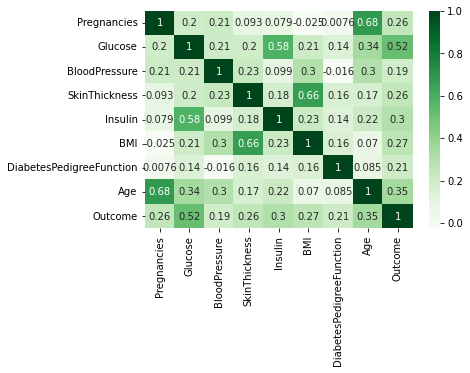

In [237]:
corr = df.corr()
heatmap = sns.heatmap(corr, cmap="Greens",annot=True)

Se realiza grafico de calor para ver correlaciones en datos de pacientes examinados.
- Existe una correlacion moderada positiva entre los indices de glucosa y el resultado positivo, de diabetes.
- Tambien es posible ver otra correlacion moderada positiva entre glucosa e insulina, lo cual es un factor directamente relacionado con la diabetes.

Con esto se obtiene una gran cantidad de parametros que influyen directamente con el resultado positivo de diabetes. 
Parametros que pueden ser controlados y monitoreados para evitar la enfermedad.

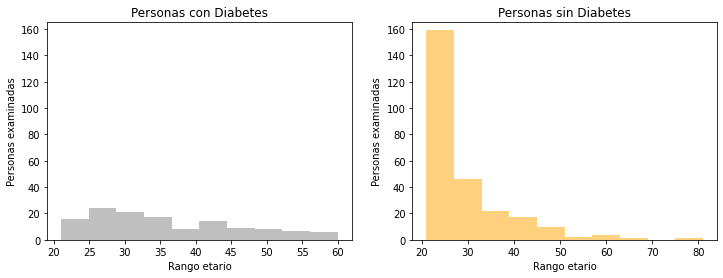

In [238]:
plt.figure(figsize =(12,4))
plt.subplot(1,2,1);
diabetes = df["Outcome"] == 1
df[diabetes]["Age"].plot(kind="hist", color="gray", alpha=0.5)
plt.title("Personas con Diabetes", fontsize = 12);
plt.ylabel("Personas examinadas")
plt.xlabel("Rango etario");
plt.ylim(bottom=0,top=165);

plt.subplot(1,2,2);
df[~diabetes]["Age"].plot(kind="hist", color="orange", alpha=0.5)
plt.title("Personas sin Diabetes", fontsize = 12);
plt.ylabel("Personas examinadas")
plt.xlabel("Rango etario");
plt.ylim(bottom=0,top=165);


Se realiza histograma para visualizar y comparar rangos etarios de personas con diabetes y sin diabetes.

Importante recalcar que ambos graficos estan en la misma escala para evitar sesgos visuales.

- El peak de diagnosticos se dio en el rango etario 20 a 30 años e incluso hasta los 35.
- Por otra parte la mayor cantidad de no diabeticos tambien se dio entre los años 20 a 30.

Como conclusion se obtiene que, si bien la edad no es un factor determinante para el diagnostico de diabetes, si es una enfermedad que abarca los años de manera constante, donde es necesario aprender a convivir con ella.
Un positivo hoy lo sera el dia de mañana mientras que, el negativo puede serlo hoy y de no tomar las medidas correspondientes lo sera el dia de mañana.

# II. Modelos para Machine Learning

## Preprocesamiento de datos

Preparacion de datos para su modelado
- Modelo de validacion train test split, con semilla definida (42)
- Escalador de datos numericos
- Preparacion de column transformer
- Ajuste de column transformer
- Transformacion de datos

In [239]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [240]:
#Selector de columnas
num_selector = make_column_selector(dtype_include = "number")

In [241]:
#Instanciar scaler
scaler = StandardScaler()

In [242]:
#Preparacion column transformer
num_tuple = (scaler, num_selector)
preprocessor = make_column_transformer(num_tuple)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f11a907d250>)])

In [243]:
#Transformacion de datos
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

**Comprobacion de preprocesamiento exitoso**

In [ ]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (294, 8)


## Modelos de Machine Learning
- Random Forest

In [244]:
rf = RandomForestClassifier(random_state= 42) # no se configura ningun hiperparametro
rf.fit(X_train_processed, y_train)# ajuste a datos procesados y vector objetivo
rf_train_score = rf.score(X_train_processed, y_train) # score en conjunto de entrenamiento
rf_test_score = rf.score(X_test_processed, y_test) # score en conjunto de prueba
rf_predict = rf.predict(X_test_processed)
print("Score para conjunto de entrenamiento por defecto:", rf_train_score,"\n""Score para conjunto de prueba por defecto:", rf_test_score)

Score para conjunto de entrenamiento por defecto: 1.0 
Score para conjunto de prueba por defecto: 0.7857142857142857


**optimizacion de modelo Random Forest**

- Se utilizaran los hiperparametros 'max_depth' y  'n_estimators' para la optimizacion
- el bucle for a continuacion nos ayuda a iterar en un rango dado para buscar el mejor rendimiento del modelo.

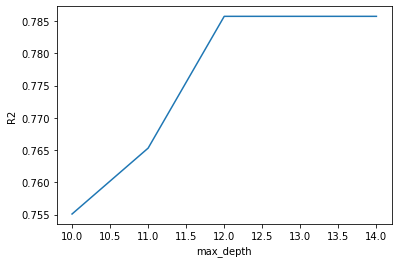

In [245]:
# Lista de valores a probar para max_depth:
max_depth = list(range(10, 15))
r2_depth = []
for x in max_depth:
    rf_x = RandomForestClassifier(max_depth = x,
                             random_state = 42)
    rf_x.fit(X_train_processed, y_train)
    score = rf_x.score(X_test_processed, y_test)
    r2_depth.append(score)
plt.plot(max_depth, r2_depth)
plt.xlabel('max_depth')
plt.ylabel('R2');

Se obtiene que, el valor optimo de max depth es 12.

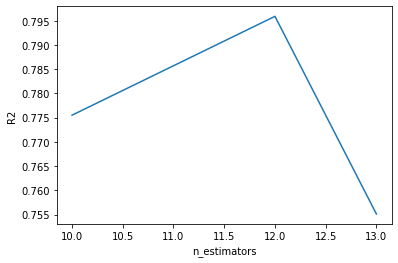

In [246]:
n_estimators = list(range(10,14))
r2_estimators = []
for x in n_estimators:
    rf_x = RandomForestClassifier( max_depth = 12,
                                  n_estimators=x,
                             random_state = 42)
    rf_x.fit(X_train_processed, y_train)
    score_estimators = rf_x.score(X_test_processed, y_test)
    r2_estimators.append(score_estimators)
plt.plot(n_estimators, r2_estimators)
plt.xlabel('n_estimators')
plt.ylabel('R2');

Se obtiene que el valor optimo de n_estimators es 12

In [249]:
rf_opt = RandomForestClassifier(random_state= 42, max_depth = 12, n_estimators=12)
rf_opt.fit(X_train_processed, y_train)
rf_train_score_opt = rf_opt.score(X_train_processed, y_train)
rf_test_score_opt = rf_opt.score(X_test_processed, y_test)
rf_opt_predict = rf_opt.predict(X_test_processed)
print("Score optimizado de RF para conjunto de entrenamiento:", rf_train_score_opt,"\n""Score optimizado de RF para conjunto de prueba:", rf_test_score_opt)

Score optimizado de RF para conjunto de entrenamiento: 0.9761904761904762 
Score optimizado de RF para conjunto de prueba: 0.7959183673469388


In [258]:
acc_score_rf = accuracy_score(y_test, rf_opt_predict)
print("Precision del modelo RF optimizado:", acc_score_rf)

Precision del modelo RF optimizado: 0.7959183673469388


Como conclusion, usando los hiperparametros encontrados en bucles for, podemos subir el rendimiento del modelo a 0.7959183673469388

## Modelos de Machine Learning
- KNN

In [250]:
knn = KNeighborsClassifier()
knn.fit(X_train_processed, y_train)
knn_train_score = knn.score(X_train_processed, y_train)
knn_test_score = knn.score(X_test_processed, y_test)
print("Score para conjunto de entrenamiento por defecto:", knn_train_score,"\n""Score para conjunto de prueba por defecto:", knn_test_score)

Score para conjunto de entrenamiento por defecto: 0.8469387755102041 
Score para conjunto de prueba por defecto: 0.7346938775510204


**optimizacion de modelo KNN**

- Se utilizara el hiperparametro  'n_neighbors' para la optimizacion
- el bucle for a continuacion nos ayuda a iterar en un rango dado para buscar el mejor rendimiento del modelo.

In [251]:
score_knn = []
for x in range(1,10):
  knn_x = KNeighborsClassifier(n_neighbors=x)
  knn_x.fit(X_train_processed,y_train)
  knn_score = knn_x.score(X_test_processed, y_test)
  score_knn.append(knn_score)
score_knn.index(max(score_knn))+1 #busqueda de valor maximo, se pone +1 para compensar dado que rango empieza en 1

8

Con esto se obtiene que el valor optimo para el modelo KNN es 8, dada la ubicacion del valor maximo arrojado por score_knn

In [255]:
knn_opt = KNeighborsClassifier(n_neighbors=8)
knn_opt.fit(X_train_processed, y_train)
knn_opt_train_score = knn_opt.score(X_train_processed, y_train)
knn_opt_test_score = knn_opt.score(X_test_processed, y_test)
knn_opt_predict = knn_opt.predict(X_test_processed)
print("Score para conjunto de entrenamiento:", knn_opt_train_score,"\n""Score para conjunto de prueba:", knn_opt_test_score)

Score para conjunto de entrenamiento: 0.8197278911564626 
Score para conjunto de prueba: 0.7551020408163265


In [256]:
acc_score_knn = accuracy_score(y_test, knn_opt_predict)
print("Precision del modelo KNN optimizado:", acc_score_knn)

Precision del modelo KNN optimizado: 0.7551020408163265


###**Resultados de modelos optimizados en conjuntos de prueba**


In [259]:
print("Score para RF")
print("Score optimizado de RF para conjunto de prueba:", rf_test_score_opt)
print("Precision del modelo RF optimizado:", acc_score_rf,"\n")
print("Score para KNN")
print("Score optimizado KNN para conjunto de prueba:", knn_opt_test_score)
print("Precision del modelo KNN optimizado:", acc_score_knn)

Score para RF
Score optimizado de RF para conjunto de prueba: 0.7959183673469388
Precision del modelo RF optimizado: 0.7959183673469388 

Score para KNN
Score optimizado KNN para conjunto de prueba: 0.7551020408163265
Precision del modelo KNN optimizado: 0.7551020408163265


## Conclusion

- Segun los datos vistos, al momento de procesarlos en primera instancia se detectan una gran cantidad de datos en 0, los cuales son de vital importancia al momento de querer predecir si un paciente padecera de diabetes o no.
ante este problema se urge la toma de muestras para los pacientes mencionados puesto que muchos de ellos podrian estar susceptibles a la enfermedad.

- La importancia de estos valores se ve de mejor manera en el grafico de calor mostrado donde todas las caracteristicas del conjunto de datos muestran una correlacion baja - moderada y positiva con la enfermedad.

Con respecto a los modelos de Machine Learning:

- Se utilizaron los modelos **RandomForest** y **KNN**.

- Random Forest obtuvo la mejor puntuacion con respecto a KNN, importante recalcar que la puntuacion mide el rendimiento del modelo y mientras mas cercana a 1 mejor.

- Esta superioridad en rendimiento se mantuvo incluso despues de optimizar ambos modelos.

- Se recomienda la utilizacion de RandomForest para la prediccion de Diabetes en el paciente.

#**Referencias**

- [Material Coding Dojo, Machine Learning](https://login.codingdojo.com/course_intro/503) 
- [Curso CodingDojo - fralfaro](https://github.com/fralfaro/CodingDojo-DataScience)